In [344]:
# Lebanese restaurent in Los Angeles

# Import required libraries
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim 
import io
import folium
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler
from statistics import mean
%matplotlib inline

In [2]:
# DATA ACQUISITION

# List of districts and neighborhoods of Los Angeles
# Get data from wikipedia page, process the page with BeautifulSoup to extract the data
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_districts_and_neighborhoods_of_Los_Angeles').text
soup = BeautifulSoup(website_url,'html')
# soup.prettify()
neighbourhoods_list = soup.findAll('ul')  # in this result set, the useful lists are the 3rd and 4th (table in 2 parts)
# Extracting neighborhoods' list
neighborhoods = []
for item in neighbourhoods_list[2].findAll('li'): # 3rd list
    neighborhoods.append(item.a.renderContents().decode("utf-8"))
for item in neighbourhoods_list[3].findAll('li'): # 4th list
    neighborhoods.append(item.a.renderContents().decode("utf-8"))

print('List of Los Angeles neighborhoods:\n' + "\n".join(neighborhoods))

List of Los Angeles neighborhoods:
Angelino Heights
Arleta
Arlington Heights
Arts District
Atwater Village
Baldwin Hills
Baldwin Hills/Crenshaw
Baldwin Village
Baldwin Vista
Beachwood Canyon
Bel Air, Bel-Air or Bel Air Estates
Benedict Canyon
Beverly Crest
Beverly Glen
Beverly Grove
Beverly Hills Post Office
Beverly Park
Beverlywood
Boyle Heights
Brentwood
Brentwood Circle
Brentwood Glen
Broadway-Manchester
Brookside
Bunker Hill
Cahuenga Pass
Canoga Park
Canterbury Knolls
Carthay
Castle Heights
Central-Alameda
Central City
Century City
Chatsworth
Chesterfield Square
Cheviot Hills
Chinatown
Civic Center
Crenshaw
Crestwood Hills
Cypress Park
Del Rey
Downtown
Eagle Rock
East Gate Bel Air
East Hollywood
Echo Park
Edendale
El Sereno
Elysian Heights
Elysian Park
Elysian Valley
Encino
Exposition Park
Faircrest Heights
Fairfax
Fashion District
Filipinotown, Historic
Financial District
Florence
Flower District
Franklin Hills
Gallery Row
Garvanza
Glassell Park
Gramercy Park
Granada Hills
Green M

In [3]:
# Correcting specific neighborhoods names
for n, i in enumerate(neighborhoods):
    if i == '[33]':
        neighborhoods[n] = 'Pico Robertson'
    if i == 'Bel Air, Bel-Air or Bel Air Estates':
        neighborhoods[n] = 'Bel Air'

neighborhoods = [s.replace('-', ' ') for s in neighborhoods]
        
print('List of Los Angeles neighborhoods:\n' + "\n".join(neighborhoods))

List of Los Angeles neighborhoods:
Angelino Heights
Arleta
Arlington Heights
Arts District
Atwater Village
Baldwin Hills
Baldwin Hills/Crenshaw
Baldwin Village
Baldwin Vista
Beachwood Canyon
Bel Air
Benedict Canyon
Beverly Crest
Beverly Glen
Beverly Grove
Beverly Hills Post Office
Beverly Park
Beverlywood
Boyle Heights
Brentwood
Brentwood Circle
Brentwood Glen
Broadway Manchester
Brookside
Bunker Hill
Cahuenga Pass
Canoga Park
Canterbury Knolls
Carthay
Castle Heights
Central Alameda
Central City
Century City
Chatsworth
Chesterfield Square
Cheviot Hills
Chinatown
Civic Center
Crenshaw
Crestwood Hills
Cypress Park
Del Rey
Downtown
Eagle Rock
East Gate Bel Air
East Hollywood
Echo Park
Edendale
El Sereno
Elysian Heights
Elysian Park
Elysian Valley
Encino
Exposition Park
Faircrest Heights
Fairfax
Fashion District
Filipinotown, Historic
Financial District
Florence
Flower District
Franklin Hills
Gallery Row
Garvanza
Glassell Park
Gramercy Park
Granada Hills
Green Meadows
Griffith Park
Hancock

In [4]:
# Forming the neighborhoods dataframe
columns = ['Neighborhood']
LA_df = pd.DataFrame(columns = columns)
LA_df['Neighborhood'] = neighborhoods
print('There are {} neighborhoods in the dataframe.'.format(LA_df.shape[0]))
LA_df.head(10)

There are 195 neighborhoods in the dataframe.


,Neighborhood
0,Angelino Heights
1,Arleta
2,Arlington Heights
3,Arts District
4,Atwater Village
5,Baldwin Hills
6,Baldwin Hills/Crenshaw
7,Baldwin Village
8,Baldwin Vista
9,Beachwood Canyon


In [5]:
# Getting the geograpical coordinates of each neighborhood
latitudes = []
longitudes = []

for neigh in LA_df['Neighborhood']:
    location = None
    for k in range(5):
        try:
            address = '{}, Los Angeles, US'.format(neigh)
            geolocator = Nominatim(user_agent="LA_explorer")
            location = geolocator.geocode(address)
            latitude = location.latitude
            longitude = location.longitude
            latitudes.append(latitude)
            longitudes.append(longitude)
            # print('The location coordinates of {} are {} and {}'.format(neigh, latitude, longitude))
            break
        except:0
            pass
    if location is None:
        latitudes.append(0)
        longitudes.append(0)
print('Done!')

The location coordinates of Angelino Heights are 34.0702889 and -118.2547965
The location coordinates of Arleta are 34.2413266 and -118.4322047
The location coordinates of Arlington Heights are 34.0434937 and -118.3213735
The location coordinates of Arts District are 34.0412389 and -118.2344503
The location coordinates of Atwater Village are 34.1186975 and -118.2623924
The location coordinates of Baldwin Hills/Crenshaw are 34.0075684 and -118.3505956
The location coordinates of Beachwood Canyon are 34.1222919 and -118.3213845
The location coordinates of Bel Air are 34.0988833 and -118.4598811
The location coordinates of Benedict Canyon are 34.0447702 and -118.4000223
The location coordinates of Beverly Crest are 34.1167701 and -118.4322607
The location coordinates of Beverly Glen are 34.1077855 and -118.4456361
The location coordinates of Beverly Grove are 34.0760338 and -118.3699723
The location coordinates of Beverly Park are 34.06376935 and -118.26468959898818
The location coordinat

The location coordinates of Solano Canyon are 34.0818871 and -118.234983
The location coordinates of South Park are 33.9959019 and -118.2697722
The location coordinates of Studio City are 34.1483989 and -118.3961877
The location coordinates of Sunland are 34.2669466 and -118.3023
The location coordinates of Sunset Junction are 34.0926493 and -118.2807954
The location coordinates of Sun Valley are 34.2204227 and -118.3878945
The location coordinates of Sylmar are 34.3076252 and -118.4492148
The location coordinates of Tarzana are 34.1714436 and -118.5429789
The location coordinates of Terminal Island are 33.7451061 and -118.26302201608382
The location coordinates of Thai Town are 34.1018533 and -118.3048616
The location coordinates of Toluca Lake are 34.1521688 and -118.3571417
The location coordinates of Toy District are 34.0470483 and -118.24551021662734
The location coordinates of Tujunga are 34.252225 and -118.2884105
The location coordinates of University Hills are 34.0666487 and -

In [6]:
# Add the obtained coordinates to our dataframe
LA_df['Latitude'] = latitudes
LA_df['Longitude'] = longitudes
# Drop those neighborhoods for which we could not find the coordinates
LA_df = LA_df[[a and b for a, b in zip(LA_df['Latitude'] != 0, LA_df['Longitude'] != 0)]].reset_index(drop=True)
print('There are {} neighborhoods in the dataframe.'.format(LA_df.shape[0]))
LA_df.head(10)

There are 155 neighborhoods in the dataframe.


,Neighborhood,Latitude,Longitude
0,Angelino Heights,34.070289,-118.254796
1,Arleta,34.241327,-118.432205
2,Arlington Heights,34.043494,-118.321374
3,Arts District,34.041239,-118.234450
4,Atwater Village,34.118698,-118.262392
5,Baldwin Hills/Crenshaw,34.007568,-118.350596
6,Beachwood Canyon,34.122292,-118.321384
7,Bel Air,34.098883,-118.459881
8,Benedict Canyon,34.044770,-118.400022
9,Beverly Crest,34.116770,-118.432261


In [7]:
# Now we will get the data of area and population of each neighborhood

# We start by adding the new columns to the dataframe
LA_df['Population'] = [0 for i in range(LA_df.shape[0])]
LA_df['Area'] = [0 for i in range(LA_df.shape[0])]

# To get the area of each neighborhood, we will use the data from this link:
# http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_LA_Neighborhoods_Data
# Although this table contains the population as well, we decide not to extract it from here since it's a bit old (2010)
website_url = requests.get('http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_LA_Neighborhoods_Data').text
soup = BeautifulSoup(website_url,'html')
# soup.prettify()
area_table = soup.findAll('table',{'class':'wikitable'})[1].findAll('tr')[1:]

In [8]:
for row in area_table:
    neighbor_name = row.findAll('td')[0].a.renderContents().strip().decode("utf-8").replace("_", " ").replace("-", " ")
    population = float(row.findAll('td')[11].renderContents())
    area = float(row.findAll('td')[12].renderContents())
    if any(LA_df['Neighborhood'] == neighbor_name):
        LA_df.loc[LA_df['Neighborhood'] == neighbor_name, 'Population'] = population
        LA_df.loc[LA_df['Neighborhood'] == neighbor_name, 'Area'] = area

In [9]:
# Drop the neighborhoods for which the area data is missing
LA_df = LA_df[LA_df['Area'] != 0].reset_index(drop=True)
LA_df = LA_df[LA_df['Population'] != 0].reset_index(drop=True)
print('There are {} neighborhoods in the dataframe.'.format(LA_df.shape[0]))
LA_df.head(10)

There are 108 neighborhoods in the dataframe.


,Neighborhood,Latitude,Longitude,Population,Area
0,Arleta,34.241327,-118.432205,31068.0,3.1
1,Arlington Heights,34.043494,-118.321374,22106.0,1.0
2,Atwater Village,34.118698,-118.262392,14888.0,1.8
3,Baldwin Hills/Crenshaw,34.007568,-118.350596,30123.0,3.0
4,Bel Air,34.098883,-118.459881,7928.0,6.6
5,Beverly Crest,34.116770,-118.432261,10610.0,7.9
6,Beverly Grove,34.076034,-118.369972,21417.0,1.7
7,Beverlywood,34.046633,-118.395038,6080.0,0.8
8,Boyle Heights,34.043689,-118.209768,92785.0,6.5
9,Brentwood,34.052140,-118.474070,31344.0,15.2


In [10]:
LA_df['Population density'] = round(LA_df['Population'] / LA_df['Area'])
LA_df.head(10)

,Neighborhood,Latitude,Longitude,Population,Area,Population density
0,Arleta,34.241327,-118.432205,31068.0,3.1,10022.0
1,Arlington Heights,34.043494,-118.321374,22106.0,1.0,22106.0
2,Atwater Village,34.118698,-118.262392,14888.0,1.8,8271.0
3,Baldwin Hills/Crenshaw,34.007568,-118.350596,30123.0,3.0,10041.0
4,Bel Air,34.098883,-118.459881,7928.0,6.6,1201.0
5,Beverly Crest,34.116770,-118.432261,10610.0,7.9,1343.0
6,Beverly Grove,34.076034,-118.369972,21417.0,1.7,12598.0
7,Beverlywood,34.046633,-118.395038,6080.0,0.8,7600.0
8,Boyle Heights,34.043689,-118.209768,92785.0,6.5,14275.0
9,Brentwood,34.052140,-118.474070,31344.0,15.2,2062.0


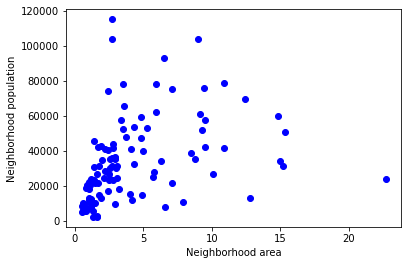

In [11]:
# Plot population as a function of area
plt.scatter(LA_df.Area, LA_df.Population,  color='blue')
plt.xlabel("Neighborhood area")
plt.ylabel("Neighborhood population")
plt.show()

In [338]:
# MAP VISUALISATION

# get the address of Los Angeles
address = 'Los Angeles, US'
geolocator = Nominatim(user_agent="LA_explorer")
location = geolocator.geocode(address)
LA_latitude = location.latitude
LA_longitude = location.longitude
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles are 34.0536909, -118.2427666.


In [339]:
# create map of Los Angeles using latitude and longitude values
map_LA = folium.Map(location=[LA_latitude, LA_longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood, pop in zip(LA_df['Latitude'], LA_df['Longitude'], LA_df['Neighborhood'], LA_df['Population density']):
    label = '{}, density {}/km'.format(neighborhood, pop)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= 5 * (pop / 10000),
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_LA)  
    
map_LA

In [134]:
# Define foursquare credentials
CLIENT_ID = 'QED5T4EOYGPHTLNIPYLSVINTSUYSVZ30GZBMENBIXAPBNVLN' # Foursquare ID
CLIENT_SECRET = 'VNDTAUQVUXIY1WCKZOUXC1L5RGYZH5BPFNY5LMSLTXOSDYVP' # Foursquare Secret
VERSION = '20200416' # API version
LIMIT = 1
radius = 500

In [135]:
def getJson(url):
    # make the GET request
    try:
        response = requests.get(url).json()
        if response == {}:
            response = {'meta':{'code':400, 'errorDetail':'Request failed'},"response":{"totalResults":0}}
    except:
        response = {'meta':{'code':400, 'errorDetail':'Request failed'},"response":{"totalResults":0}}
            
    return response

def get_venue_count(LA_df, ind, categoryId):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION,
        LA_df['Latitude'][ind],
        LA_df['Longitude'][ind], 
        radius, 
        LIMIT,
        categoryId)    
    json_result = getJson(url)
    
    if json_result['meta']['code'] == 400:
        # if address is not geocodable, try latitude/longitude instead
        print(json_result['meta']['errorDetail'])
        
#     near = LA_df['Neighborhood'][ind] + ', Los Angeles, CA'
#     url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&radius={}&limit={}&categoryId={}'.format(
#             CLIENT_ID, 
#             CLIENT_SECRET, 
#             VERSION,
#             near, 
#             radius, 
#             LIMIT,
#             categoryId)

#     json_result = getJson(url)

    # print('nb of venues in {} = {}'.format(LA_df['Neighborhood'][ind], json_result["response"]["totalResults"]))
    return json_result["response"]["totalResults"]

In [136]:
# Getting number of restaurants in each neighborhood
restaurants_count = []
lebanese_restaurants_count = []

for ind in range(LA_df.shape[0]):
    restaurants_count.append(get_venue_count(LA_df, ind, '4d4b7105d754a06374d81259')) # categoryId 'Food'
    lebanese_restaurants_count.append(get_venue_count(LA_df, ind, '58daa1558bbb0b01f18ec1cd')) # categoryId 'Lebanese restaurant'
    
LA_df['Restaurants count'] = restaurants_count
LA_df['Lebanese restaurants count'] = lebanese_restaurants_count

LA_df

Request failed
Request failed


,Neighborhood,Latitude,Longitude,Population,Area,Population density,Restaurants count,Lebanese restaurants count
0,Arleta,34.241327,-118.432205,31068.0,3.1,10022.0,2,0
1,Arlington Heights,34.043494,-118.321374,22106.0,1.0,22106.0,12,0
2,Atwater Village,34.118698,-118.262392,14888.0,1.8,8271.0,27,0
3,Baldwin Hills/Crenshaw,34.007568,-118.350596,30123.0,3.0,10041.0,0,0
4,Bel Air,34.098883,-118.459881,7928.0,6.6,1201.0,0,0
5,Beverly Crest,34.116770,-118.432261,10610.0,7.9,1343.0,0,0
6,Beverly Grove,34.076034,-118.369972,21417.0,1.7,12598.0,42,1
7,Beverlywood,34.046633,-118.395038,6080.0,0.8,7600.0,2,0
8,Boyle Heights,34.043689,-118.209768,92785.0,6.5,14275.0,26,0
9,Brentwood,34.052140,-118.474070,31344.0,15.2,2062.0,6,0


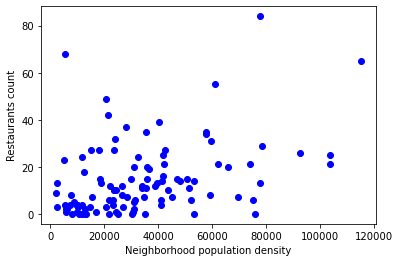

In [308]:
# Plot 
plt.scatter(LA_df['Population density'], LA_df['Restaurants count'],  color='blue')
plt.xlabel("Neighborhood population density")
plt.ylabel("Restaurants count")
plt.show()

In [142]:
# Getting number of nearby attractions
attractions_entertainment = []
attractions_college = []
attractions_events = []
attractions_outdoors = []
attractions_professional = []
attractions_travel = []

for ind in range(LA_df.shape[0]):                                   
    attractions_entertainment.append(get_venue_count(LA_df, ind, '4d4b7104d754a06370d81259')) # categoryId 'Arts & Entertainment'
    attractions_college.append(get_venue_count(LA_df, ind, '4d4b7105d754a06372d81259')) # categoryId 'College & University'
    attractions_events.append(get_venue_count(LA_df, ind, '4d4b7105d754a06373d81259')) # categoryId 'Event'
    attractions_outdoors.append(get_venue_count(LA_df, ind, '4d4b7105d754a06377d81259')) # categoryId 'Outdoors & Recreation'
    attractions_professional.append(get_venue_count(LA_df, ind, '4d4b7105d754a06375d81259')) # categoryId 'Professional & Other Places'
    attractions_travel.append(get_venue_count(LA_df, ind, '4d4b7105d754a06379d81259')) # categoryId 'Travel & Transport'
    
LA_df['Attractions entertainment'] = attractions_entertainment
LA_df['Attractions college'] = attractions_college
LA_df['Attractions events'] = attractions_events
LA_df['Attractions outdoors'] = attractions_outdoors
LA_df['Attractions professional'] = attractions_professional
LA_df['Attractions travel'] = attractions_travel

# Sum the total number of attractions in a new column
LA_df['Total attractions'] = LA_df[['Attractions entertainment','Attractions college','Attractions events','Attractions outdoors','Attractions professional','Attractions travel']].sum(axis=1)

LA_df

Request failed


,Neighborhood,Latitude,Longitude,Population,Area,Population density,Restaurants count,Lebanese restaurants count,Restaurants per capita,Lebanese restaurants per capita,Attractions entertainment,Attractions college,Attractions events,Attractions outdoors,Attractions professional,Attractions travel
0,Arleta,34.241327,-118.432205,31068.0,3.1,10022.0,2,0,0.000064,0.000000,2,1,0,0,3,0
1,Arlington Heights,34.043494,-118.321374,22106.0,1.0,22106.0,12,0,0.000543,0.000000,12,1,1,1,14,6
2,Atwater Village,34.118698,-118.262392,14888.0,1.8,8271.0,27,0,0.001814,0.000000,27,3,0,6,27,4
3,Baldwin Hills/Crenshaw,34.007568,-118.350596,30123.0,3.0,10041.0,0,0,0.000000,0.000000,0,0,0,3,0,0
4,Bel Air,34.098883,-118.459881,7928.0,6.6,1201.0,0,0,0.000000,0.000000,0,0,0,0,1,0
5,Beverly Crest,34.116770,-118.432261,10610.0,7.9,1343.0,0,0,0.000000,0.000000,0,0,0,1,0,1
6,Beverly Grove,34.076034,-118.369972,21417.0,1.7,12598.0,42,1,0.001961,0.000047,42,1,0,17,56,6
7,Beverlywood,34.046633,-118.395038,6080.0,0.8,7600.0,2,0,0.000329,0.000000,2,0,0,1,0,0
8,Boyle Heights,34.043689,-118.209768,92785.0,6.5,14275.0,26,0,0.000280,0.000000,26,3,0,5,26,4
9,Brentwood,34.052140,-118.474070,31344.0,15.2,2062.0,6,0,0.000191,0.000000,6,3,0,9,57,3


In [371]:
# create map of Los Angeles using latitude and longitude values
map_LA_attractions = folium.Map(location=[LA_latitude, LA_longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood, attractions in zip(LA_df['Latitude'], LA_df['Longitude'], LA_df['Neighborhood'], LA_df['Total attractions']):
    label = '{}, {} Attractions'.format(neighborhood, attractions)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= attractions / 10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_LA_attractions)  
    
map_LA_attractions

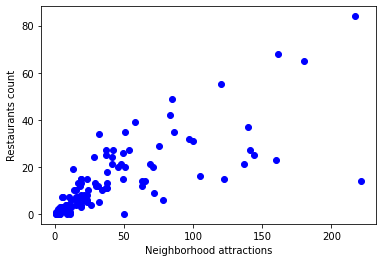

In [310]:
# Plot 
plt.scatter(LA_df['Total attractions'], LA_df['Restaurants count'],  color='blue')
plt.xlabel("Neighborhood attractions")
plt.ylabel("Restaurants count")
plt.show()

In [417]:
# CLUSTERING NEIGHBORHOODS
# Now we will start the process of clustering the neighborhoods

# We select the population density and the total number of attractions as features for clustering
selected_features = ['Population density','Total attractions']
LA_selected = LA_df[selected_features]

# We normalize the dataframe before running k-means
LA_clustering = StandardScaler().fit_transform(LA_selected)

# k-means clustering
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(LA_clustering)


In [418]:
# Insert the labels in the original dataframe
try:
    LA_df.drop(['Cluster label'], axis=1, inplace=True)
except:
    pass
    
LA_df.insert(1, 'Cluster label', kmeans.labels_)

# LA_df.drop(['Cluster Label'], axis=1, inplace=True)
display_features = ['Neighborhood','Cluster label','Population density','Total attractions','Restaurants count','Lebanese restaurants count']
LA_df[display_features]

,Neighborhood,Cluster label,Population density,Total attractions,Restaurants count,Lebanese restaurants count
0,Arleta,0,10022.0,6,2,0
1,Arlington Heights,2,22106.0,31,12,0
2,Atwater Village,0,8271.0,54,27,0
3,Baldwin Hills/Crenshaw,0,10041.0,3,0,0
4,Bel Air,0,1201.0,1,0,0
5,Beverly Crest,0,1343.0,2,0,0
6,Beverly Grove,1,12598.0,83,42,1
7,Beverlywood,0,7600.0,2,2,0
8,Boyle Heights,2,14275.0,49,26,0
9,Brentwood,1,2062.0,78,6,0


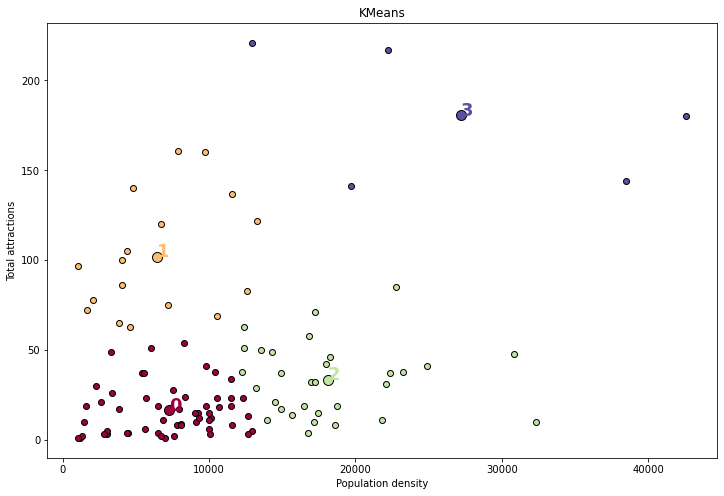

In [419]:
# Let us visualize the clustering with a plot
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(12, 8))

X = LA_df['Population density']
Y = LA_df['Total attractions']

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(kmeans.labels_) to get the
# unique labels.
colors_array = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans.labels_))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len(kmeans.cluster_centers_)), colors_array):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (kmeans.labels_ == k)
    
    # Define the centroid, or cluster center.
    cluster_center = [mean(X[my_members]) , mean(Y[my_members])]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members], Y[my_members], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
    
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=10)    
    ax.text(cluster_center[0], cluster_center[1], str(k), color=col, fontdict={'weight': 'bold', 'size': 18})

# Title of the plot
ax.set_title('KMeans')

plt.xlabel("Population density")
plt.ylabel("Total attractions")

# Show the plot
plt.show()

In [398]:
LA_df.drop(['Cluster label'], axis=1, inplace=True)

In [421]:
# Cluster 0
LA_df.loc[LA_df['Cluster label'] == 0, display_features]

,Neighborhood,Cluster label,Population density,Total attractions,Restaurants count,Lebanese restaurants count
0,Arleta,0,10022.0,6,2,0
2,Atwater Village,0,8271.0,54,27,0
3,Baldwin Hills/Crenshaw,0,10041.0,3,0,0
4,Bel Air,0,1201.0,1,0,0
5,Beverly Crest,0,1343.0,2,0,0
7,Beverlywood,0,7600.0,2,2,0
10,Broadway Manchester,0,1467.0,10,3,0
15,Chatsworth,0,2255.0,30,12,0
16,Chesterfield Square,0,10103.0,12,3,0
17,Cheviot Hills,0,4443.0,4,1,0


In [422]:
# Cluster 1
LA_df.loc[LA_df['Cluster label'] == 1, display_features]

,Neighborhood,Cluster label,Population density,Total attractions,Restaurants count,Lebanese restaurants count
6,Beverly Grove,1,12598.0,83,42,1
9,Brentwood,1,2062.0,78,6,0
12,Carthay,1,9732.0,160,23,0
14,Century City,1,7876.0,161,68,2
21,Downtown,1,4803.0,140,37,0
28,Encino,1,4411.0,105,16,1
64,Pacific Palisades,1,1055.0,97,32,0
71,Playa Vista,1,1642.0,72,9,0
74,Reseda,1,10538.0,69,21,0
75,San Pedro,1,7193.0,75,29,1


In [423]:
# Cluster 2
LA_df.loc[LA_df['Cluster label'] == 2, display_features]

,Neighborhood,Cluster label,Population density,Total attractions,Restaurants count,Lebanese restaurants count
1,Arlington Heights,2,22106.0,31,12,0
8,Boyle Heights,2,14275.0,49,26,0
11,Canoga Park,2,12378.0,63,14,0
13,Central Alameda,2,18612.0,8,4,0
18,Chinatown,2,22751.0,85,49,0
19,Cypress Park,2,13949.0,11,4,0
23,East Hollywood,2,30820.0,48,21,2
24,Echo Park,2,16856.0,58,39,0
29,Exposition Park,2,17257.0,71,20,0
31,Florence,2,15648.0,14,10,0


In [424]:
# Cluster 3
LA_df.loc[LA_df['Cluster label'] == 3, display_features]

,Neighborhood,Cluster label,Population density,Total attractions,Restaurants count,Lebanese restaurants count
42,Hollywood,3,22234.0,217,84,1
47,Koreatown,3,42619.0,180,65,0
88,University Park,3,19663.0,141,27,0
102,West Los Angeles,3,38459.0,144,25,2
103,Westwood,3,12950.0,221,14,0


In [425]:
# create map of Los Angeles using latitude and longitude values
map_clusters = folium.Map(location=[LA_latitude, LA_longitude], zoom_start=10)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
for lat, lng, neighborhood, cluster, pop in zip(LA_df['Latitude'], LA_df['Longitude'], LA_df['Neighborhood'], LA_df['Cluster label'], LA_df['Population density']):
    label = folium.Popup('{}, Cluster {}'.format(neighborhood, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= 5 * (pop / 10000),
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)  
    
map_clusters